### EpyModel examples
This notebook demonstrates how to instantiate, run, and plot the results for a few different discrete-time epidemiological models.

**Model classes**
* [SIR](#SIR)
* [SIRS](#SIRS)
* [SEIR](#SEIR)
* [CModel](#CModel)

**Additional features**
* [Saving & Loading](#saving)
* [Multiple runs](#runs)
* [Plotting](#plotting)
* [Random sampling](#sampling)


In [1]:
from EpyModels.utils import plot_states, save_model, load_model
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 10, 5

In [23]:
##### Set initial parameters for all examples below.

# Environment parameters
pop = 100000 # size of popluation
prop_S = 0.99999 # % of population in Susceptible state (S), where applicable 
prop_E = 0 # [SIRS, and NSEIRS_I models only] % of population in Exposed state (E)
prop_I = 1- prop_S # % of population in Infected state (I)
prop_R = 0 # % of population in Recovered state (R)
prop_N = 0 # [NSEIRS_I model only] % of population in Not susceptible state (N)

# Disease parameters
b = 2.5/3 # % the number of people that one infected individual will infect or expose in one time unit
s_rate= 0.15 #  [SIRS, and NSEIRS_I models only] the number of people that one infected individual will infect (or expose) in one time unit
d_inc=5 # [SEIR, and NSEIRS_I models only] 1/(the average number of days an exposed person becomes infected)
d_rec = 28 # The average duration until infection recovery
d_mort = 32 # the average duration until infection death
rate_mort = 0.05 # Avearage proportion of patients who will experience infection-related mortality

<a id='SIR'></a>

## SIR model 
This is a simple a implementation of discrete-time SIR model with state space *Susceptible, Infected, Recovered,* and *Dead*

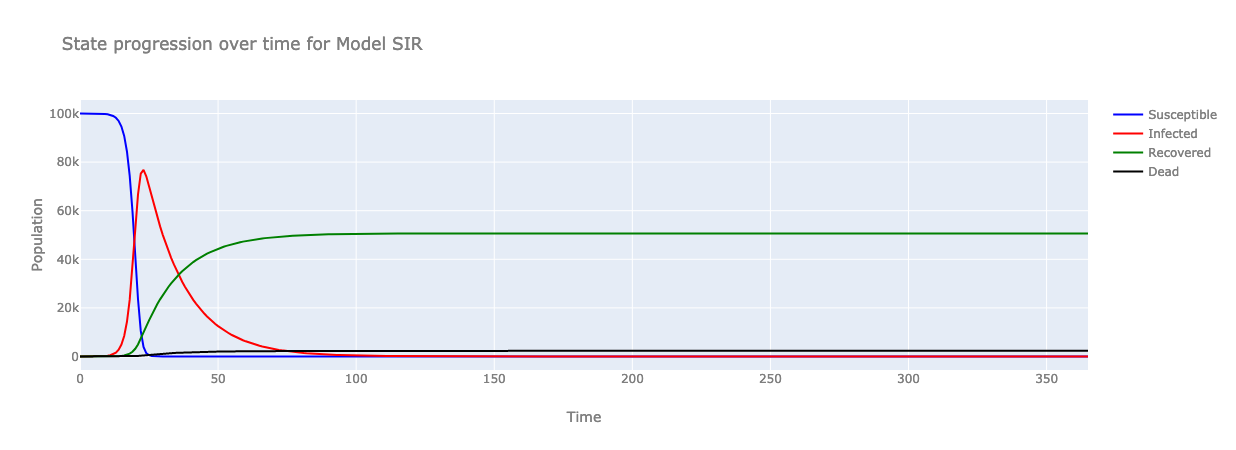

In [24]:
# SIR
from EpyModels.models.SIR import SIR

sir = SIR(name="SIR",
            population=pop,
            init_s=prop_S,
            init_i=prop_I,
            init_r=prop_R,
            beta=b,
            mortality_rate = rate_mort,
            mortality_duration=d_mort,
            recovery_duration=d_rec)

# Run model for 365 time units
sir.run(T=365)

# Plot states over time
plot_states(sir,type='line')

<a id='SIRS'></a>

## SIRS model 
An implementation of discrete-time SIRS model with state space *Susceptible, Infected, Recovered,* and *Dead*. Recovered individuals can become susceptible again after some time.

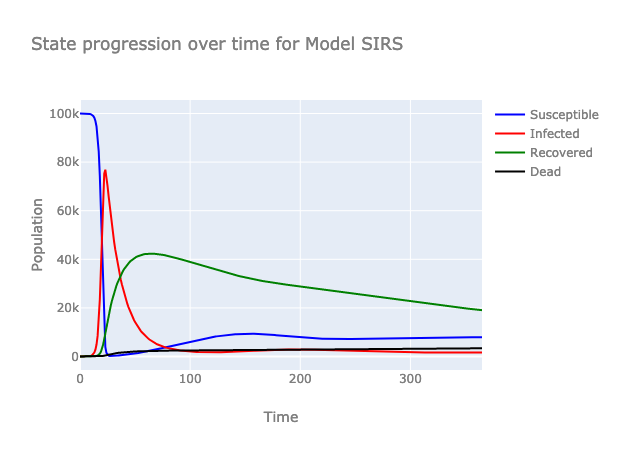

In [25]:
# SIRS
from EpyModels.models.SIRS import SIRS

sirs = SIRS(name="SIRS",
            population=pop,
            init_s=prop_S,
            init_i=prop_I,
            init_r=prop_R,
            beta=b,
            mortality_rate = rate_mort,
            mortality_duration=d_mort,
            recovery_duration=d_rec,
            susceptible_rate = s_rate )

# Run model for 365 time units
sirs.run(T=365)

# Plot states over time
plot_states(sirs,type='line')

<a id='SEIR'></a>

## SEIR model 
An implementation of discrete-time SEIR *(Susceptible-Exposed-Infected-Recovered)* model with state space *Susceptible, Exposed, Infected, Recovered,* and *Dead*

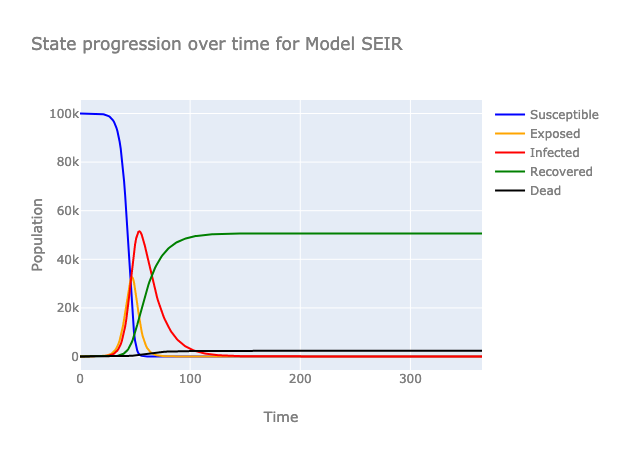

In [26]:
# Simple SEIR
from EpyModels.models.SEIR import SEIR

seir = SEIR(name="SEIR",
            population=pop,
            init_s=prop_S,
            init_e=prop_E,
            init_i=prop_I,
            init_r=prop_R,
            beta=b,
            incubation_duration=d_inc,
            mortality_rate = rate_mort,
            mortality_duration=d_mort,
            recovery_duration=d_rec)

# Run model for 365 time units
seir.run(T=365)

# Plot states over time
plot_states(seir,type='line')

<a id='CModel'></a>

## CModel, a generalized compartmental model
An implementation of discrete-time compartmental model with state space *Not susceptible, Susceptible, Exposed, Infected, Recovered,* and *Dead* with interventions

This class can accepts an optional argument `interventions`, which takes a dictionary of interventions (vaccination and/or a tranmission reduction intervention) in the following format: `{'vaccination_time':<start_time>,'vaccination_rate':<people_per_day>, 'intervention_time': <start_time>, 'intervention_effect':<reduction on transmission rate beta>}`

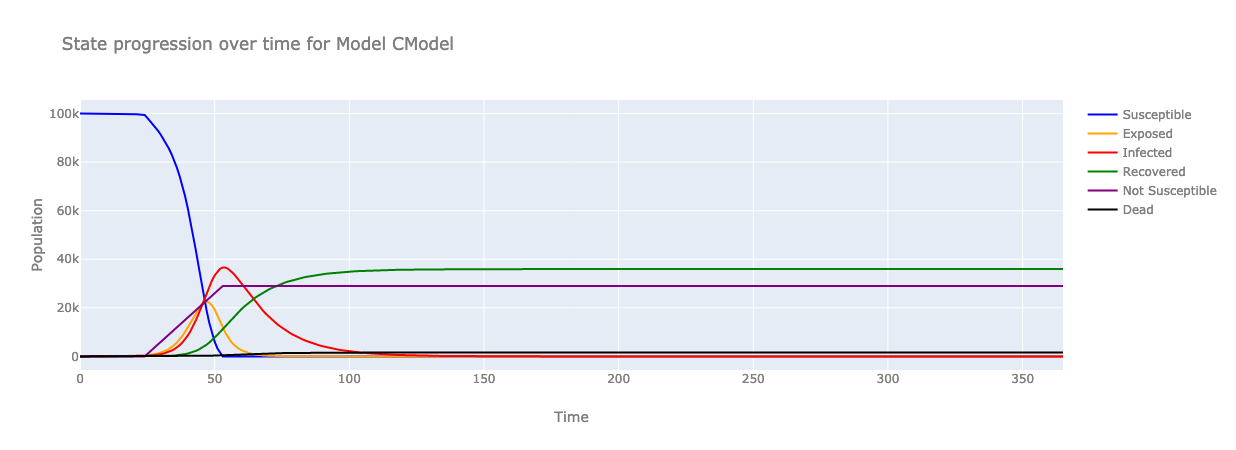

In [27]:
from EpyModels.models.CModel import CModel

cmodel = CModel(name="CModel",
            population=pop,
            init_s=prop_S,
            init_e=prop_E,
            init_i=prop_I,
            init_n=prop_N,
            init_r=prop_R,
            beta=b,
            incubation_duration=d_inc,
            mortality_rate = rate_mort,
            mortality_duration=d_mort,
            recovery_duration=d_rec,
            interventions={'vaccination_time':25,'vaccination_rate':1000, 'intervention_time': 1, 'intervention_effect':0})

cmodel.run(T=365)

plot_states(cmodel)

<a id='saving'></a>

### Saving and loading models

In [10]:
# Save model
save_model(sir,'SIR')

#load model
sir = load_model('SIR.pkl')

<a id='runs'></a>

### Mulitple runs
The model can be run for multiple replications

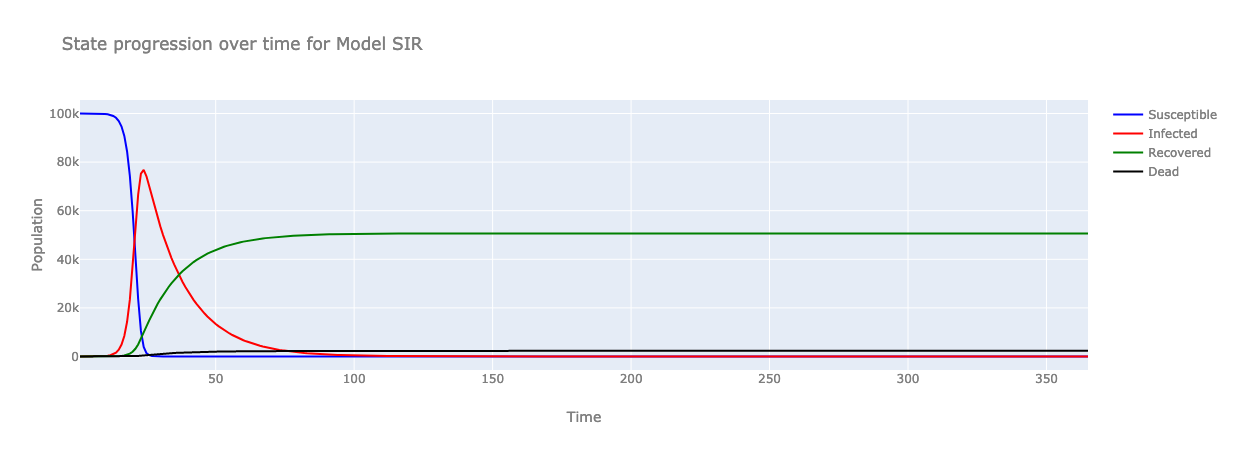

In [28]:
sir = SIR(name="SIR",
            population=pop,
            init_s=prop_S,
            init_i=prop_I,
            init_r=prop_R,
            beta=b,
            mortality_duration=d_mort,
            mortality_rate=rate_mort,
            recovery_duration=d_rec)

# Specify number of runs in .run()
sir.run(T=365,runs=3)

# Specify which run to plot
plot_states(sir,type='line',run=2)

<a id='plotting'></a>

### Plotting model states over time

After running a model for some T > 1, you can plot the states over time using the plotting function, `plot_states(model, type='line',run=1)`, which takes three arguments: 
* `model`: A model object
* `type`: 'line' (default) or 'bar' (stacked bar plot) 
* `run`: 1 (default), any number from a simulation run for multiple replications.

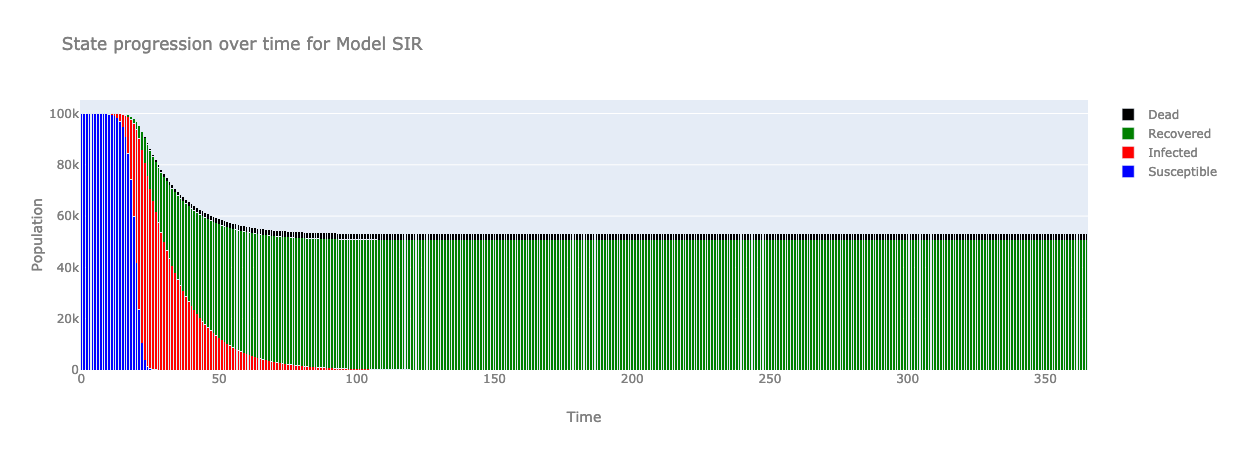

In [29]:
plot_states(sir,type='bar',run=1)

<a id='sampling'></a>

### Adding uncertainty to model parameters
Model parameters can be randomly sampled at the begining of each run by passing a dict to the `dist_params` argument. The dcit should include a parameter name key, which maps to another dict containing the probability distribution name (valid names:`gaussian`, `uniform`, `triangular`, and `exponential`), and the parameters of that distribution along with their corresponding values. 
`e.g. {'param1_name: {'distribution': <dist_name1>, 'values':{<val1name>, : val1, <val2name>: val2, ...}}}`


Note in the example below that distribution parameter names follow the `numpy.random.*` parameter names (e.g. for `uniform` distribution, `np.random.uniform`, params would be `low` and `high`.) See the function  `generate_sample()` in `EpyModels/utils.py` and consult the numpy random function documentation for more details.


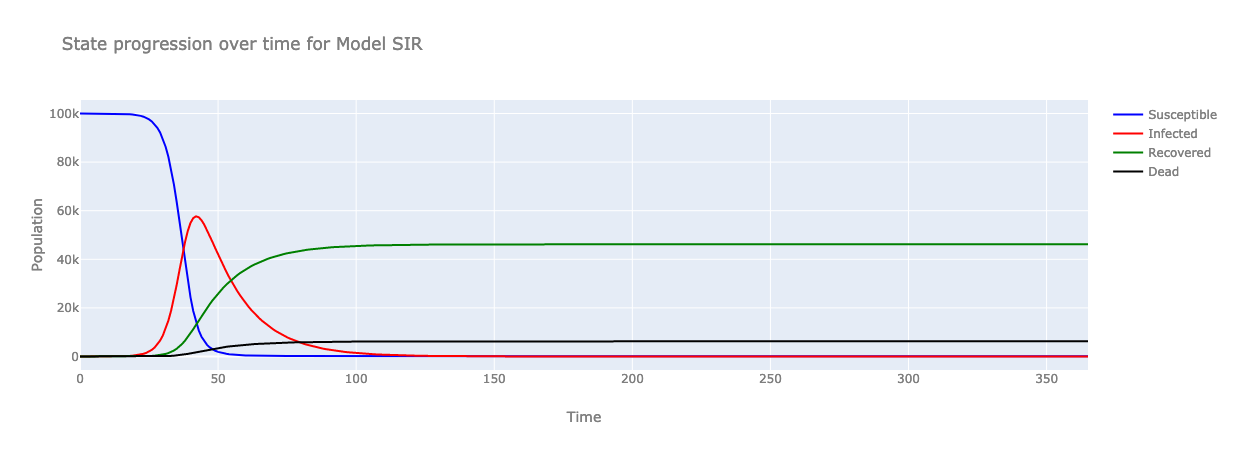

In [30]:
sir = SIR(name="SIR",
            population=pop,
            init_s=prop_S,
            init_i=prop_I,
            init_r=prop_R,
            beta=b,
            recovery_duration=d_rec,
            mortality_rate=rate_mort,
            mortality_duration=d_mort,
            dist_params={'beta': {'distribution':'uniform','values':{'low':1/3, 'high':2/3}},'mortality_rate': {'distribution':'uniform','values':{'low':0.05, 'high':0.15}} })


sir.run(T=365)

# Specify which run to plot
plot_states(sir,type='line')